In [3]:
import uproot
import coffea
from coffea import hist
import numpy as np
import seutils

%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
base = 'root://cmseos.fnal.gov//store/user/klijnsma/semivis/flatntuple_Apr30/'
datasets = [base +d for d in [
    'merged_Mar25s-channel_mMed-150_mDark-20_rinv-0_alpha-peak_HT400_13TeV-madgraphMLM-pythia8.root',
    'merged_Mar25s-channel_mMed-250_mDark-20_rinv-0.3_alpha-peak_HT400_13TeV-madgraphMLM-pythia8.root',
    'merged_Mar25s-channel_mMed-250_mDark-20_rinv-0_alpha-peak_HT400_13TeV-madgraphMLM-pythia8.root',
    'merged_Mar25s-channel_mMed-450_mDark-20_rinv-0.3_alpha-peak_HT400_13TeV-madgraphMLM-pythia8.root',
    'merged_Mar25s-channel_mMed-450_mDark-20_rinv-0_alpha-peak_HT400_13TeV-madgraphMLM-pythia8.root',
    'merged_Mar25s-channel_mMed-50_mDark-20_rinv-0.3_alpha-peak_HT400_13TeV-madgraphMLM-pythia8.root',
    'merged_Mar25s-channel_mMed-50_mDark-20_rinv-0_alpha-peak_HT400_13TeV-madgraphMLM-pythia8.root',
    'merged_Mar25s-channel_mMed-650_mDark-20_rinv-0.3_alpha-peak_HT400_13TeV-madgraphMLM-pythia8.root',
    'merged_Mar25s-channel_mMed-650_mDark-20_rinv-0_alpha-peak_HT400_13TeV-madgraphMLM-pythia8.root',
    ]]
rootfile = datasets[3]
print(rootfile)

root://cmseos.fnal.gov//store/user/klijnsma/semivis/flatntuple_Apr30/merged_Mar25s-channel_mMed-450_mDark-20_rinv-0.3_alpha-peak_HT400_13TeV-madgraphMLM-pythia8.root


In [12]:
fin = uproot.open(rootfile)
tree = fin[b'SoftdropAnalyzer'][b'tree']
def get_branch(branchname):
    return tree.arrays(branchname)[branchname]

## Some event level stats

In [13]:
all_jets = get_branch(b'all_ak15jet')
is_matched = get_branch(b'is_matched')
jets = get_branch(b'matched_ak15jet')
print('# of jets / evt =', all_jets.counts.sum() / tree.numentries)
print('# of z\'-matched jets / evt =', jets.counts.sum() / tree.numentries)

print('all_jets.shape:', all_jets.shape)
print('is_matched.shape:', is_matched.shape)
print('is_matched[is_matched].counts.sum():', is_matched[is_matched].counts.sum())
print('jets.shape:', jets.shape)
print('jets.counts.sum():', jets.counts.sum())

# of jets / evt = 11.02263185782995
# of z'-matched jets / evt = 0.27519972283361865
all_jets.shape: (98136,)
is_matched.shape: (98136,)
is_matched[is_matched].counts.sum(): 27007
jets.shape: (98136,)
jets.counts.sum(): 27007


## Basic selection function, using HT > 400 and jet-pt > 100

In [159]:
minpt = 100.
matched_select_pt = get_branch(b'matched_ak15jet').pt > minpt
nonmatched_select_pt = (get_branch(b'all_ak15jet').pt > minpt) & (~is_matched)

def get_matched_nonmatched_branches(varname):
    matched_var = get_branch(b'matched_' + varname)[matched_select_pt]
    nonmatched_var = get_branch(b'all_' + varname)[nonmatched_select_pt]
    return matched_var, nonmatched_var

def plot_matched_nonmatched_branches(
        varname,
        matched,
        nonmatched,
        xmin=0.,
        xmax=500.,
        title=None,
        ax=None,
        ):
    if not title: title = varname
    h = hist.Hist(
        'Density',
        hist.Cat('thing', title),
        hist.Bin(varname, title, 100, xmin, xmax)
        )
    try:
        matched = matched.flatten()
        nonmatched = nonmatched.flatten()
    except AttributeError:
        print('Could not call .flatten(); should be 1D array now:')
        print(matched.shape)
        print(nonmatched.shape)
    h.fill(thing='matched AK15 jet', **{varname: matched})
    h.fill(thing='non-matched AK15 jet', **{varname: nonmatched})
    if not ax:
        fig = plt.figure(figsize=(7,7))
        ax = fig.gca()
    hist.plot1d(h, ax=ax, density=True)
    ax.set_xlabel(title, fontsize=18)
    ax.set_ylabel('Density', fontsize=18)
    return ax

# Plots

/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


(0.001, 4.412179615183933)

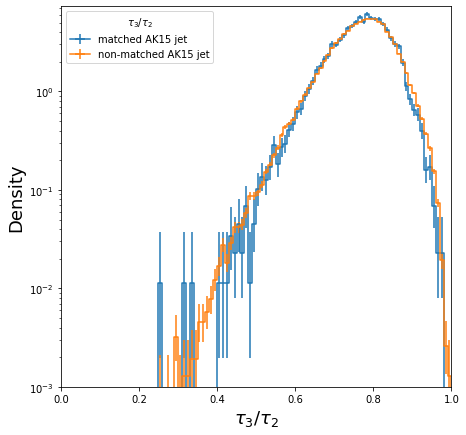

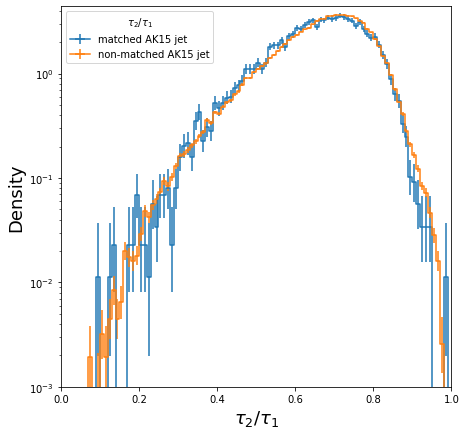

In [146]:
tau3_matched, tau3_nonmatched = get_matched_nonmatched_branches(b'ak15jet_Tau3')
tau2_matched, tau2_nonmatched = get_matched_nonmatched_branches(b'ak15jet_Tau2')
tau1_matched, tau1_nonmatched = get_matched_nonmatched_branches(b'ak15jet_Tau1')

tau32_matched = tau3_matched / tau2_matched
tau32_nonmatched = tau3_nonmatched / tau2_nonmatched
tau21_matched = tau2_matched / tau1_matched
tau21_nonmatched = tau2_nonmatched / tau1_nonmatched

ax32 = plot_matched_nonmatched_branches('tau32', tau32_matched, tau32_nonmatched, xmin=0., xmax=1., title=r'$\tau_{3} / \tau_{2}$')
ax32.set_yscale('log')
ax32.set_ylim(0.001)
ax21 = plot_matched_nonmatched_branches('tau21', tau21_matched, tau21_nonmatched, xmin=0., xmax=1., title=r'$\tau_{2} / \tau_{1}$')
ax21.set_yscale('log')
ax21.set_ylim(0.001)


/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


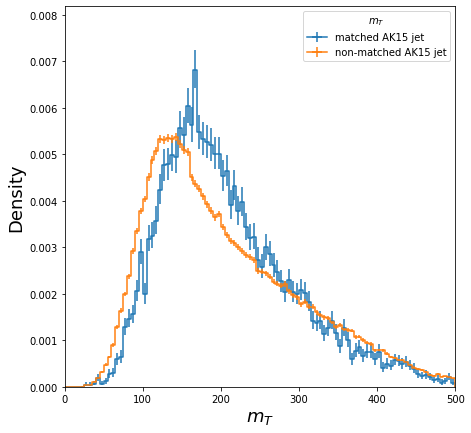

In [147]:
mt_matched, mt_nonmatched = get_matched_nonmatched_branches(b'ak15jet_MTwMET')
ax = plot_matched_nonmatched_branches('mt', mt_matched, mt_nonmatched, title=r'$m_{T}$')

/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


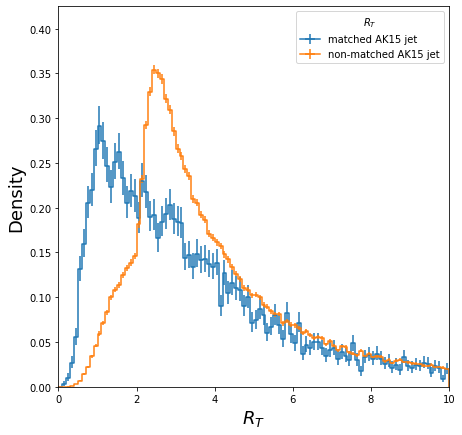

In [150]:
met = get_branch(b'met').pt
rt_matched = mt_matched / met
rt_nonmatched = mt_nonmatched / met
ax = plot_matched_nonmatched_branches('rt', rt_matched, rt_nonmatched, title=r'$R_{T}$', xmax=10.)

/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


(0.0001, 0.012985011148200177)

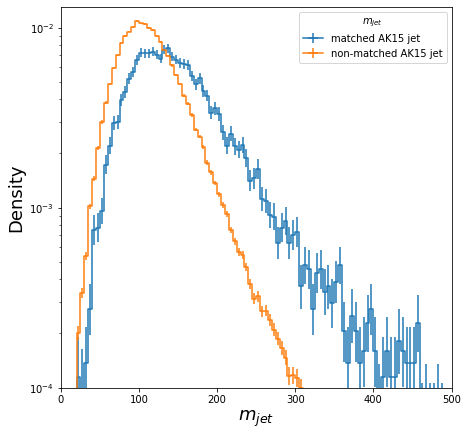

In [151]:
jets_matched, jets_nonmatched = get_matched_nonmatched_branches(b'ak15jet')
jetmass_matched = np.array([float(j.mass) for j in jets_matched.flatten() if j.mag2 >= 0.])
jetmass_nonmatched = np.array([float(j.mass) for j in jets_nonmatched.flatten() if j.mag2 >= 0.])
ax = plot_matched_nonmatched_branches('jetmass', jetmass_matched, jetmass_nonmatched, title=r'$m_{jet}$')
ax.set_yscale('log')
ax.set_ylim(0.0001)

/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


(0.0001, 0.013766079760769252)

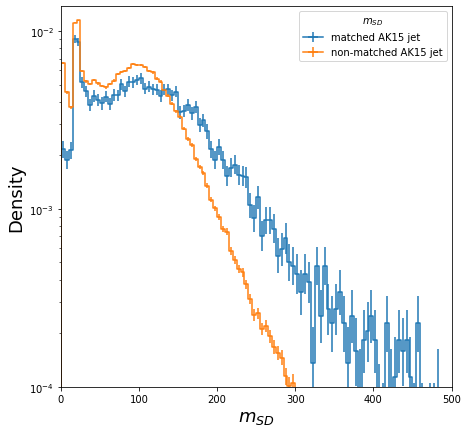

In [152]:
summedsdjet_matched, summedsdjet_nonmatched = get_matched_nonmatched_branches(b'summedsubjets')
msd_matched = np.array([float(j.mass) for j in summedsdjet_matched.flatten() if j.mag2 >= 0.])
msd_nonmatched = np.array([float(j.mass) for j in summedsdjet_nonmatched.flatten() if j.mag2 >= 0.])
ax = plot_matched_nonmatched_branches('msd', msd_matched, msd_nonmatched, title=r'$m_{SD}$')
ax.set_yscale('log')
ax.set_ylim(0.0001)

/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


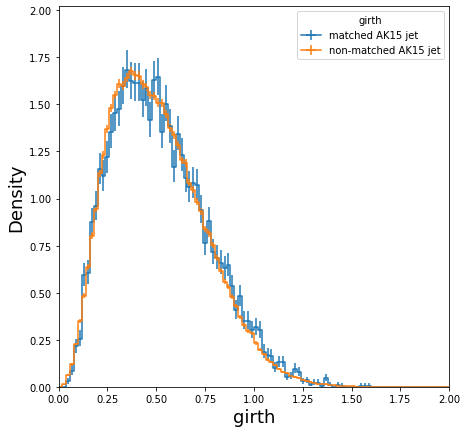

In [153]:
girth_matched, girth_nonmatched = get_matched_nonmatched_branches(b'ak15jet_MomentGirth')
ax = plot_matched_nonmatched_branches('girth', girth_matched, girth_nonmatched, xmax=2.)

# Subjet logic

In [54]:
subjet = get_branch(b'all_subjets')
subjet_index = get_branch(b'all_subjets_index')
subjet_count = get_branch(b'all_subjets_count')

In [79]:
print(subjet.counts)
print(subjet_index.counts)
print(subjet_count.counts)
print(np.unique(subjet_count.flatten()))
print(subjet_count[21])

[26 34 18 24 18 14 18 28 24 16 16 22 18 28 28 16 28 30 20 22  8  9 26 28
 22 12 26 20 24 12 28 22 26 20 26 10 22 14 18 24 30 26 12 22 28 18 28 14
 12 10 24 24 22 16 26 16 16 34 10 18 22 24 24 32 16 16 22 20 14 26 26 20
 28 26 26 26 28 22 14 28 32 30 24 14 18 32 18 30 26 18 14 22 16 26 22 21
 20 32 28 26]
[26 34 18 24 18 14 18 28 24 16 16 22 18 28 28 16 28 30 20 22  8  9 26 28
 22 12 26 20 24 12 28 22 26 20 26 10 22 14 18 24 30 26 12 22 28 18 28 14
 12 10 24 24 22 16 26 16 16 34 10 18 22 24 24 32 16 16 22 20 14 26 26 20
 28 26 26 26 28 22 14 28 32 30 24 14 18 32 18 30 26 18 14 22 16 26 22 21
 20 32 28 26]
[13 17  9 12  9  7  9 14 12  8  8 11  9 14 14  8 14 15 10 11  4  5 13 14
 11  6 13 10 12  6 14 11 13 10 13  5 11  7  9 12 15 13  6 11 14  9 14  7
  6  5 12 12 11  8 13  8  8 17  5  9 11 12 12 16  8  8 11 10  7 13 13 10
 14 13 13 13 14 11  7 14 16 15 12  7  9 16  9 15 13  9  7 11  8 13 11 11
 10 16 14 13]
[1 2]
[2 2 1 2 2]


In [51]:
subjet[subjet_index == 18].counts

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Example plots

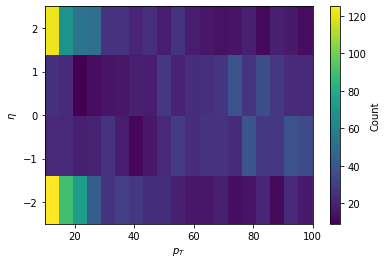

In [156]:
jet_kinematics = hist.Hist(
    "Count",
    hist.Bin("pt", r"$p_{T}$", 19, 10, 100),
    hist.Bin("eta", r"$\eta$", [-2.5, -1.4, 0, 1.4, 2.5]),
    )
jet_kinematics.fill(pt=jets.pt.flatten(), eta=jets.eta.flatten())
ax = hist.plot2d(jet_kinematics, xaxis='pt')

/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


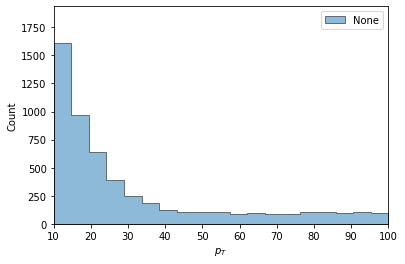

In [157]:
jet_pt = jet_kinematics.integrate("eta", overflow='under')

ax = hist.plot1d(
    jet_pt,
    fill_opts={'alpha': .5, 'edgecolor': (0,0,0,0.3)}
    )